# KMeans from Scratch

Machine Learning Class at ITESO - 2023

In [95]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create Data

In [96]:
# create fake data
X, y = make_blobs(n_samples = 100, centers = 3, n_features = 2, random_state = 42, cluster_std = 2)

In [97]:
set(y)

{0, 1, 2}

In [98]:
df = pd.DataFrame()
df['class'] = y
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]
df

,class,x1,x2
0,2,-8.573215,-9.909804
1,1,6.266913,-0.488559
2,0,-3.448146,10.099406
3,1,7.445467,-0.830532
4,2,-6.164052,-5.758541
...,...,...,...
95,0,-3.863042,10.237639
96,0,-0.447199,10.876846
97,1,4.317307,2.781271
98,2,-4.713525,-4.772505


<Axes: xlabel='x1', ylabel='x2'>

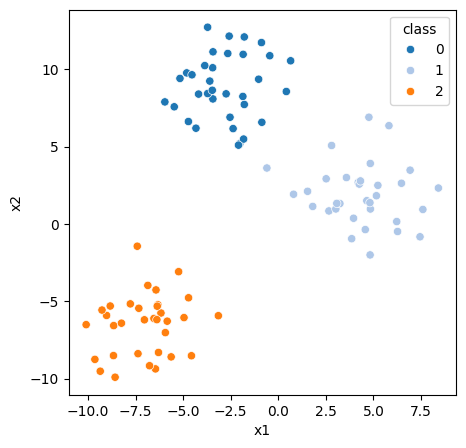

In [99]:
import seaborn as sns

plt.figure(figsize=(5,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'class', data = df, legend = 'full', palette = 'tab20')

# Algorithm


## Step 1
Randomly pick 𝒌 data points as our initial Centroids.

In [100]:
k = 3

# Step 1

idx = np.random.choice(len(X), k, replace=False)
centroids = X[idx]
idx

array([ 4, 83, 43])

## Step 2
Find the distance between each data points in our training set with the 𝒌 centroids.


In [101]:
from scipy.spatial.distance import cdist

# Step 2
distances = cdist(X,centroids)
distances[0:5]

array([[ 4.7996928 ,  6.72692355, 19.61606304],
       [13.50191154, 10.87556645, 15.12096943],
       [16.08883529, 16.03465791,  1.85137072],
       [14.47426325, 11.75809117, 16.24395215],
       [ 0.        ,  3.02098383, 15.19938093]])

## Step 3
Now assign each data point to the closest centroid

In [102]:
# Step 3
points = np.argmin(distances, axis=1)
points

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0,
       2, 0, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2], dtype=int64)

## Step 4
Update centroid location by taking the average of the points in each cluster group.


In [103]:
# Step 4
temp_centroids = []

for cluster in range(k):
    temp_cluster_centroid = X[points==cluster].mean(axis=0)
    temp_centroids.append(temp_cluster_centroid)

temp_centroids = np.array(temp_centroids)
temp_centroids
centroids

array([[-6.16405247, -5.75854054],
       [-3.14807817, -5.93244375],
       [-5.16556972,  9.4080086 ]])

# Step 5
Centroid change? Convergence

In [104]:
centroids, temp_centroids

(array([[-6.16405247, -5.75854054],
        [-3.14807817, -5.93244375],
        [-5.16556972,  9.4080086 ]]),
 array([[-7.22821365, -6.42363765],
        [ 3.90780019,  0.4869966 ],
        [-1.55874781,  8.00945955]]))

In [105]:
# Step 5
if ( (centroids == temp_centroids).all() ):
    print("Done")
else:
    print("Not Done")
    centroids = temp_centroids

Not Done


# All together

In [106]:
def kmeans(X, k):
    
    # Step 1
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx]
    idx 
    
    while True:
        # Step 2
        distances = cdist(X,centroids)

        # Step 3
        points = np.argmin(distances, axis=1)

        # Step 4
        temp_centroids = []

        for cluster in range(k):
            temp_cluster_centroid = X[points==cluster].mean(axis=0)
            temp_centroids.append(temp_cluster_centroid)

        temp_centroids = np.array(temp_centroids)

        # Step 5
        if ( (centroids == temp_centroids).all() ):
            # Done
            return points, centroids

        else:
            centroids = temp_centroids

In [107]:
k = 2
points, centroids = kmeans(X, k)

In [108]:
centroids

array([[-7.02379204, -6.47232379],
       [ 0.71274196,  5.43283772]])

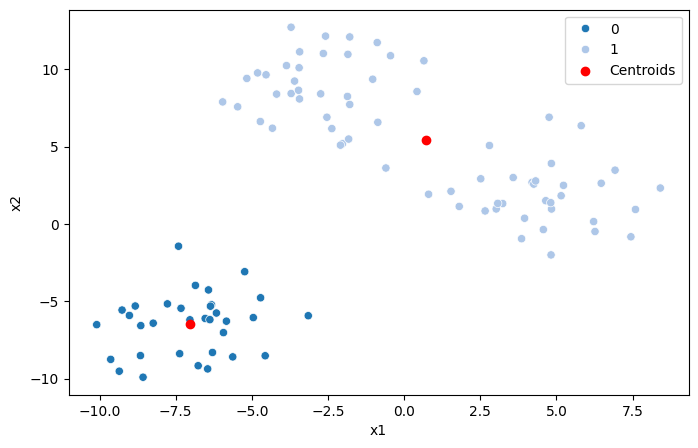

In [109]:
df = pd.DataFrame()
df['cluster'] = points
df['x1'] = X[:, 0]
df['x2'] = X[:, 1]

# plot
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'x1', y = 'x2', hue = 'cluster', data = df, legend = 'full', palette = 'tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], c = 'r', label = 'Centroids')
plt.legend()

# The Elbow Method + Sklearn

In [110]:
from sklearn.cluster import KMeans

k = 2
kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)

In [111]:
print("Points: ", kmeans.labels_)
# print("Centroids: ", kmeans.cluster_centers_[0])

Points:  [1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [112]:
print("Score: ", kmeans.inertia_)
print("Score: ", kmeans.score(X))

Score:  2361.773515175247
Score:  -2361.7735151752468


In [113]:
wcss = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, random_state  = 42).fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method

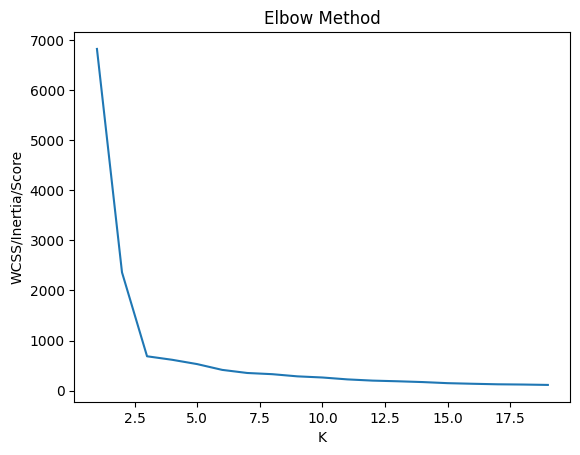

In [114]:
plt.plot(range(1, 20), wcss)
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("WCSS/Inertia/Score")
plt.show()